In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping
# import librosa.display

# import IPython.display as ipd
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, roc_curve


Using TensorFlow backend.


In [2]:
data = pd.read_csv('python_codes/dataset_500_50_recordings_v3.csv')
data.head()# Dropping unneccesary columns

,birdSound,sound_median,sound_mean,sound_std,chroma_stft_median,chroma_stft_mean,chroma_stft_std,rms_median,rms_mean,rms_std,...,mfcc_median18,mfcc_mean18,mfcc_std18,mfcc_median19,mfcc_mean19,mfcc_std19,mfcc_median20,mfcc_mean20,mfcc_std20,label
0,351230.mp3,0.000000e+00,-6.142107e-05,0.012161,0.596200,0.529412,0.342621,0.002863,0.005909,0.010629,...,6.046153,5.956075,5.962350,9.087703,9.135355,6.044546,8.104885,8.139686,5.670450,Red_crossbill
1,365803.mp3,3.176906e-07,-8.101284e-09,0.035807,0.391162,0.424132,0.311685,0.006933,0.022807,0.027601,...,2.963391,3.257329,6.337379,9.306860,9.189724,6.112482,-1.249606,-1.692509,5.749753,Red_crossbill
2,364248.mp3,0.000000e+00,7.826290e-08,0.023321,0.500404,0.506566,0.294321,0.003329,0.010292,0.020916,...,6.002545,6.172754,4.921592,-2.660161,-2.276274,3.988553,5.196372,5.018038,4.176434,Red_crossbill
3,512152.mp3,2.295497e-05,4.515932e-05,0.009364,0.831979,0.799930,0.171446,0.008113,0.008701,0.003462,...,8.155019,7.944302,4.671725,6.125269,6.154128,4.302269,8.689074,8.654900,4.420681,Red_crossbill
4,365803.mp3,3.176906e-07,-8.101284e-09,0.035807,0.391162,0.424132,0.311685,0.006933,0.022807,0.027601,...,2.963391,3.257329,6.337379,9.306860,9.189724,6.112482,-1.249606,-1.692509,5.749753,Red_crossbill


In [4]:
mask = (data["label"] == "Red_crossbill") | \
       (data["label"] == "House_sparrow") | \
       (data["label"] == "Eurasian_skylark") | \
       (data["label"] == "Common_raven") | \
       (data["label"] == 'Black-headed_gull') | \
       (data["label"] == "Olive-backed_pipit") | \
       (data["label"] == "Eurasian_collared-dove") | \
       (data["label"] == 'Brown-crested_flycatcher') | \
       (data["label"] == "Mallard") | \
       (data["label"] == "Warbling_vireo") | \
       (data["label"] == "Gray_wagtail") | \
       (data["label"] == "Canada_goose") | \
       (data["label"] == "Dark-eyed_junco") | \
       (data["label"] == "Common_crane") | \
       (data["label"] == "Curve-billed_thrasher") | \
       (data["label"] == "Dusky-capped_flycatcher") | \
       (data["label"] == "Marsh_wren") | \
       (data["label"] == "Whooper_swan") | \
       (data["label"] == "Tropical_kingbird") | \
       (data["label"] == "Common_tern") | \
       (data["label"] == "Hudsonian_whimbrel") | \
       (data["label"] == "Ring-necked_pheasant") 

In [5]:
data = data[mask]

In [6]:
data = data.drop(['birdSound'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = np.array(data.iloc[:, :-1], dtype = float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train_sc = scaler.fit_transform(X_train)#Dividing data into training and Testing set
X_test_sc = scaler.transform(X_test)

In [7]:
pd.Series(y).value_counts()

2     640
4     503
0     502
16    501
15    500
12    499
10    498
9     494
1     483
13    471
19    457
11    450
7     430
3     418
6     395
8     392
14    386
18    357
17    355
5     333
20    306
dtype: int64

In [8]:
X_train.shape

(7496, 81)

In [9]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0
)

model = Sequential()
model.add(layers.Dense(81, activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(25, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
y_test

array([ 4, 19,  2, ..., 20,  4,  3])

In [11]:
y_train

array([10, 20,  4, ...,  3, 13,  2])

In [12]:
classifier = model.fit(X_train_sc,
                    y_train,
                    epochs=1500,
                    batch_size=500,
                    validation_data=(X_test_sc,y_test),
#                     callbacks=[es],
                    verbose=0)

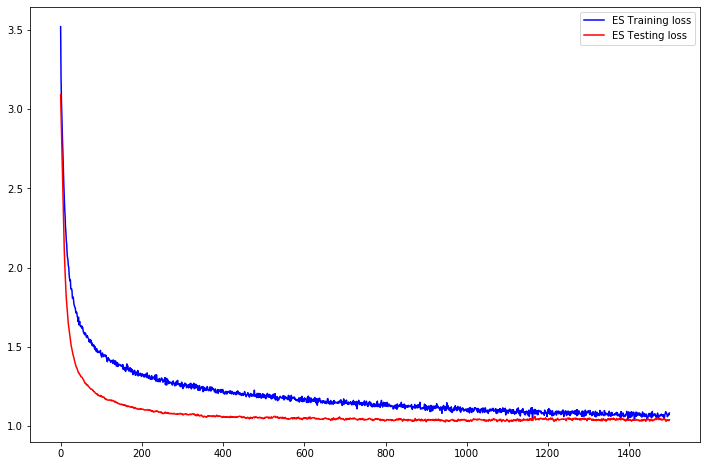

In [13]:
train_loss_es = classifier.history['loss']
test_loss_es = classifier.history['val_loss']
plt.figure(figsize=(12, 8))
# plt.plot(train_loss, label='Training loss', color='navy')
# plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_es, label='ES Training loss', color='blue')
plt.plot(test_loss_es, label='ES Testing loss', color='red')
plt.legend();

In [14]:
y_test

array([ 4, 19,  2, ..., 20,  4,  3])

In [15]:
model.predict_classes(X_test_sc)

array([ 4, 19,  2, ..., 17,  4,  3])

In [16]:
j = y_test == model.predict_classes(X_test_sc)

In [17]:
correct = 0
incorrect = 0 
for i in j:
    if i :
        correct += 1
    else:
        incorrect += 1

In [18]:
correct

1341

In [19]:
incorrect

533

In [20]:
y_test.shape

(1874,)

In [21]:
(correct / (correct+incorrect))*100

71.5581643543223

In [22]:
Y_pred = model.predict_classes(X_test_sc)

In [23]:
print(classification_report(y_test, model.predict_classes(X_test_sc)))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       100
           1       0.71      0.66      0.68        97
           2       0.72      0.84      0.78       128
           3       0.84      0.73      0.78        84
           4       0.72      0.68      0.70       101
           5       0.69      0.55      0.61        67
           6       0.81      0.63      0.71        79
           7       0.54      0.62      0.57        86
           8       0.60      0.60      0.60        78
           9       0.84      0.85      0.84        99
          10       0.69      0.71      0.70       100
          11       0.64      0.79      0.71        90
          12       0.71      0.72      0.71       100
          13       0.71      0.80      0.75        94
          14       0.66      0.70      0.68        77
          15       0.76      0.81      0.79       100
          16       0.77      0.70      0.73       100
          17       0.73    

In [24]:
 for i, x in enumerate(encoder.inverse_transform(pd.Series(y_test).sort_values().unique())):
    print(i, x)

0 Black-headed_gull
1 Brown-crested_flycatcher
2 Canada_goose
3 Common_crane
4 Common_raven
5 Common_tern
6 Curve-billed_thrasher
7 Dark-eyed_junco
8 Dusky-capped_flycatcher
9 Eurasian_collared-dove
10 Eurasian_skylark
11 Gray_wagtail
12 House_sparrow
13 Mallard
14 Marsh_wren
15 Olive-backed_pipit
16 Red_crossbill
17 Ring-necked_pheasant
18 Tropical_kingbird
19 Warbling_vireo
20 Whooper_swan


In [25]:
pd.Series(y_test).sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [26]:
rec,sr = librosa.load('Black-headed Gull  Test.mp3')

In [27]:
def extract_features(filename, bird_sound, label):

    print("Extracting features from {}".format(bird_sound))
    y, sr = librosa.load(bird_sound, mono=True, sr=44000)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    row_data = f'{np.median(y)} {np.mean(y)} {np.std(y)} \
                 {np.median(chroma_stft)} {np.mean(chroma_stft)} {np.std(chroma_stft)} \
                 {np.median(rms)} {np.mean(rms)} {np.std(rms)} \
                 {np.median(spec_cent)} {np.mean(spec_cent)} {np.std(spec_cent)} \
                 {np.median(spec_bw)} {np.mean(spec_bw)} {np.std(spec_bw)} \
                 {np.median(rolloff)} {np.mean(rolloff)} {np.std(rolloff)} \
                 {np.median(zcr)} {np.mean(zcr)} {np.std(zcr)}'
    for e in mfcc:
        row_data += f' {np.median(e)} {np.mean(e)} {np.std(e)}'
    print("Extracting features from {} complete".format(bird_sound))
    return row_data

In [33]:
# fn = 'Black-headed Gull  Test.mp3'
fn = 'Red Crossbill.mp3'
# fn = 'Eurasian Collared Dove.mp3'
test_data = extract_features(fn , fn , 'Red Crossbill')

Extracting features from Red Crossbill.mp3
Extracting features from Red Crossbill.mp3 complete


In [34]:
test_data = pd.DataFrame(test_data.split()).T

In [35]:
test_data = np.array(test_data, dtype = float)

In [36]:
X_test_test_sc = scaler.transform(test_data)

In [37]:
model.predict_classes(X_test_test_sc)

array([18])